# Topic 30: Ensemble Methods

- onl01-dtsc-ft-022221
- 05/12/21

## Learning Objectives

- Discuss the various types of ensembles methods
- Compare and contrast them and their advantages/disadvantages

- Activity: Mini-Project on Iowa Prisoner Recividism 
    - Discuss feature engineering.
    - Create Baseline models 
        - Dummy
        - DecisionTree
    - Review GridSearchCV
    - Apply various ensemble methods.
        - RandomForests
        - Bagging
        - ExtraTrees 
        - XGBoost
    - Dealing with imbalanced classes with categorical features.
    
    
- Quick overview of Cross Validation methods (other than GridSearch) + saving models. (If there's time).
    - IF we don't get to it:
        - Solution code in `Notes rep` > `Phase_3` > `scratch_notebooks` > `topic_29_decision_trees_v2-with_crossval_model_saving.ipynb` (look for the header with a ⭐️)    
        
        
- **If there's time left:**
    - Option 1: Attempt a meta-classifier from our best models.

    - Option 2: Moving functions to .py files.
    - Option 3: Quick Intro to Finding a Dataset for the Project
   


## Questions?

# Ensemble Methods: Overview

> ***Ensemble Methods take advantage of the delphic technique (or "wisdom of crowds") where the average of multiple independent estimates is usually more consistently accurate than the individual estimates.***


#### Types of Ensembles 

- Bootstrap Aggregation (Bagging)
    - Bagging Classifier
    - Random Forests
- Gradient Boosting:
    - Adaboost
    - Gradient Boosted Trees
    - XGBoost
- Model Stacking A.K.K. Meta-Ensembling
    - VotingClassifer
    - StackingClassifier



## Bootstrap Aggregation (Bagging)


<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/Flashcards/Bagging_web.png">
The process for training an ensemble through bootstrap aggregation is as follows:

1. Grab a sizable sample from your dataset, with replacement 
2. Train a classifier on this sample  
3. Repeat until all classifiers have been trained on their own sample from the dataset  
4. When making a prediction, have each classifier in the ensemble make a prediction 
5. Aggregate all predictions from all classifiers into a single prediction, using the method of your choice  



<img src="https://raw.githubusercontent.com/jirvingphd/dsc-ensemble-methods-online-ds-ft-100719/master/images/new_bagging.png">

### Random Forests

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/Flashcards/Random_Forest_web.png">

- Because decision trees are greedy algorithms, every tree given same data would make same conclusions.
- **In addition to bagging**, random forests use **subspace sampling**

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-random-forests-online-ds-ft-100719/master/images/new_rf-diagram.png" width=70%>




### Benefits and drawbacks

#### Benefits

* **_Strong performance_** Because this is an ensemble algorithm, the model is naturally resistant to noise and variance in the data, and generally tends to perform quite well. 

* **_Interpretability_**:  each tree in the random forest is a **_Glass-Box Model_** (meaning that the model is interpretable, allowing us to see how it arrived at a certain decision), the overall random forest is, as well! 

#### Drawbacks

* **_Computational complexity_**: On large datasets, the runtime can be quite slow compared to other algorithms.

* **_Memory usage_**: Random forests tend to have a larger memory footprint that other models. It's not uncommon to see random forests that were trained on large datasets have memory footprints in the tens, or even hundreds of MB. 


## Boosting / Gradient Boosted Trees

### Weak learners

All the models we've learned so far are **_Strong Learners_** -- models with the goal of doing as well as possible on the classification or regression task they are given. 

The term **_Weak Learner_** refers to simple models that do only slightly better than random chance. 

Boosting algorithms start with a single weak learner (usually trees), but technically, any model will do. 

Boosting works as follows:

1. Train a single weak learner  
2. Figure out which examples the weak learner got wrong  
3. Build another weak learner that focuses on the areas the first weak learner got wrong  
4. Continue this process until a predetermined stopping condition is met, such as until a set number of weak learners have been created, or the model's performance has plateaued  

### Adaboost & Gradient Boosted Trees


#### Adaboost (Adaptive Boosting)

- **_Key Takeaway:_** Adaboost creates new classifiers by continually influencing the distribution of the data sampled to train each successive learner. 
- Uses subsampling with **weighted-probabilities for incorrect predictions to be included in subsequent weak learner**

<img src="https://raw.githubusercontent.com/learn-co-curriculum/dsc-gradient-boosting-and-weak-learners/master/images/new_adaboost.png" width=50%>

#### Gradient Boosted Trees
- More advanced form - uses gradient descent.
- Trains successive trees on the **residuals**

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-gradient-boosting-and-weak-learners-online-ds-ft-100719/master/images/new_gradient-boosting.png">


### Differences between Gradient Boosting and Random Forests

- Independent vs iterative
    - in Random Forests one tree is unaffacted by another.
    - in Boosting mode each tree is iteratively created to address the prior tree's weaknesses.
    
- Weak vs Strong

    - In a random forest, each tree is a strong learner -- they would do just fine as a decision tree on their own.
    - In boosting algorithms, trees are artificially limited to a very shallow depth (usually only 1 split) 
        - to ensure that **each model is only slightly better than random chance**. 

- Aggregate Predictions:
    - in RF each tree votes
    - in boosting models trees are given weight for being good at "hard tasks"
    

## Modeling Stacking / Meta-Ensembling

- Model stacking is when you use the predictions of one model as the input to another model.
<img src="https://burakhimmetoglu.files.wordpress.com/2016/12/workflow.png?w=1140">

# Activity: Predicting Recidivism in Iowa Prisoners 

## OBTAIN

- Iowa has a major problem with recidivism,  where ~38% of all inmates released from prison wind up back in jail after returning to a life of crime (AKA recidivism).
- Dataset contains information on released prisoners and if they returned to prison within 3 years of being release. 
    - Dataset can be [found on Kaggle](https://www.kaggle.com/slonnadube/recidivism-for-offenders-released-from-prison), which was extracted from [Iowa's data portal](https://data.iowa.gov/Correctional-System/3-Year-Recidivism-for-Offenders-Released-from-Pris/mw8r-vqy4). 

- We will be using a partially pre-processed version of the dataset (columns have been renamed/simplified).

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/LSA_map_with_counties_districts_and_B54A5BBCE4156.jpg" width=50%> 



In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-notebook')

In [2]:
# raw_data = 'https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/datasets/FULL_3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa.csv'
# renamed_data = 'https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/datasets/Iowa_Prisoners_Renamed_Columns_fsds_100719.csv'
# renamed_data= "https://raw.githubusercontent.com/jirvingphd/iowa-prisoner-recidivism-mod-3-project/master/data/iowa_recidivism_renamed_2021.csv"
renamed_data="./Iowa_Prisoners_Renamed_Columns_fsds_100719.csv"
df = pd.read_csv(renamed_data,index_col=0)
df

## Drop unwanted cols using year
df = df.drop(columns=['yr_released','report_year'])
df.head()

,race_ethnicity,age_released,crime_class,crime_type,crime_subtype,release_type,super_dist,recidivist,target_pop,sex
0,Black - Non-Hispanic,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,Yes,Male
1,White - Non-Hispanic,25-34,D Felony,Property,Theft,Discharged – End of Sentence,NaN,Yes,No,Male
2,White - Non-Hispanic,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,Yes,Male
3,White - Non-Hispanic,25-34,B Felony,Other,Other Criminal,Parole,6JD,No,Yes,Male
4,Black - Non-Hispanic,35-44,D Felony,Violent,Assault,Discharged – End of Sentence,NaN,Yes,No,Male


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26020 entries, 0 to 26019
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   race_ethnicity  25990 non-null  object
 1   age_released    26017 non-null  object
 2   crime_class     26020 non-null  object
 3   crime_type      26020 non-null  object
 4   crime_subtype   26020 non-null  object
 5   release_type    24258 non-null  object
 6   super_dist      16439 non-null  object
 7   recidivist      26020 non-null  object
 8   target_pop      26020 non-null  object
 9   sex             26017 non-null  object
dtypes: object(10)
memory usage: 2.2+ MB


## SCRUB

- Null values (fill or drop)
- Data Types (finding categorical variables)
- Inspect the value_counts/labels of categoricals
- Scaling or lack-off
- One hot encoding


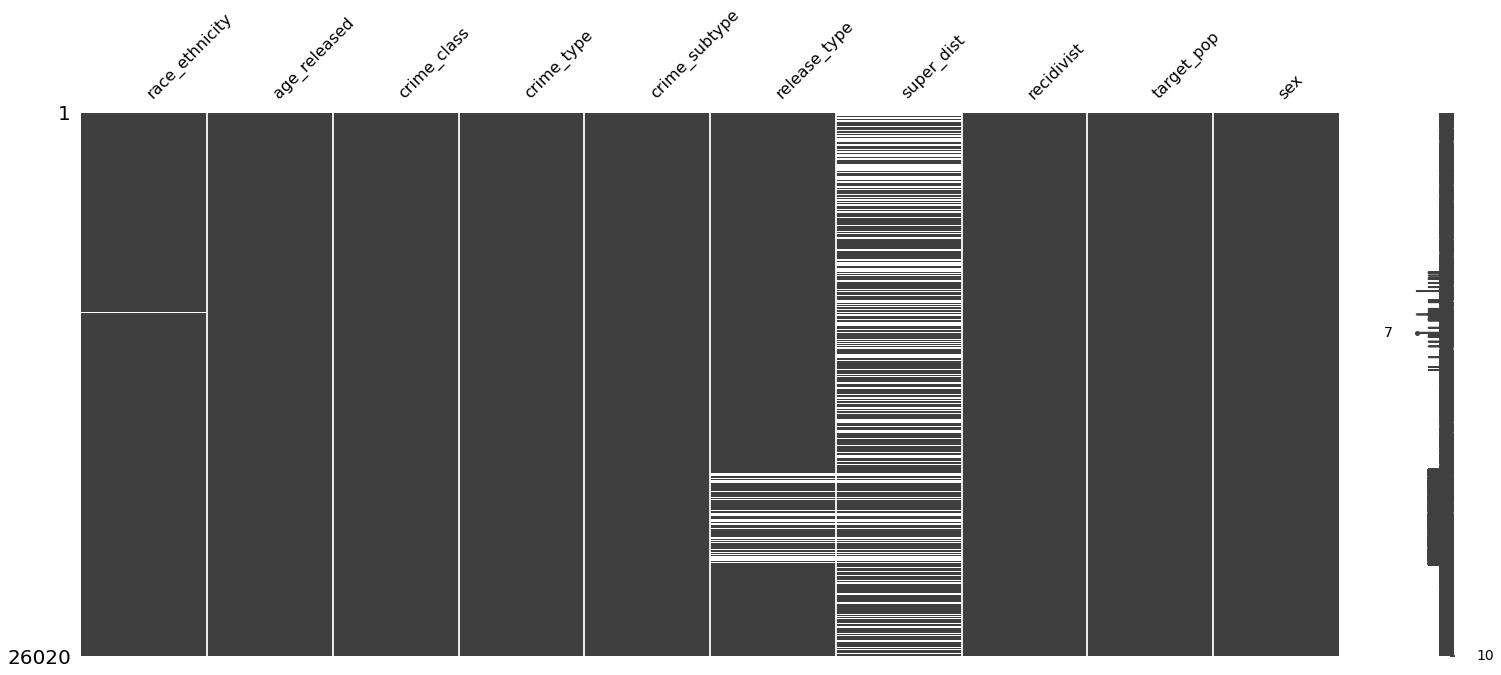

,#null,%null
race_ethnicity,30,0.12
age_released,3,0.01
crime_class,0,0.00
crime_type,0,0.00
crime_subtype,0,0.00
release_type,1762,6.77
super_dist,9581,36.82
recidivist,0,0.00
target_pop,0,0.00
sex,3,0.01


In [4]:
## Check null values
import missingno
missingno.matrix(df)
plt.show()
null_check = pd.DataFrame({
    '#null':df.isna().sum(),
    '%null':round(df.isna().sum()/len(df)*100,2)
})
null_check

In [5]:
## inspect categories
dashes = '---'*20
for col in df.columns:
    print(dashes)
    print(f"Value Counts for {col}:")
    display(df[col].value_counts(dropna=False))

------------------------------------------------------------
Value Counts for race_ethnicity:


White - Non-Hispanic                               17584
Black - Non-Hispanic                                6109
White - Hispanic                                    1522
American Indian or Alaska Native - Non-Hispanic      502
Asian or Pacific Islander - Non-Hispanic             192
Black - Hispanic                                      37
NaN                                                   30
American Indian or Alaska Native - Hispanic           20
White -                                               12
N/A -                                                  5
Asian or Pacific Islander - Hispanic                   5
Black -                                                2
Name: race_ethnicity, dtype: int64

------------------------------------------------------------
Value Counts for age_released:


25-34           9554
35-44           6223
Under 25        4590
45-54           4347
55 and Older    1303
NaN                3
Name: age_released, dtype: int64

------------------------------------------------------------
Value Counts for crime_class:


D Felony                                    10487
C Felony                                     6803
Aggravated Misdemeanor                       4930
B Felony                                     1765
Felony - Enhancement to Original Penalty     1533
Felony - Enhanced                             220
Serious Misdemeanor                           155
Special Sentence 2005                          98
Felony - Mandatory Minimum                     11
Other Felony                                    6
A Felony                                        4
Simple Misdemeanor                              3
Sexual Predator Community Supervision           2
Other Felony (Old Code)                         2
Other Misdemeanor                               1
Name: crime_class, dtype: int64

------------------------------------------------------------
Value Counts for crime_type:


Drug            7915
Property        7371
Violent         5816
Public Order    3608
Other           1310
Name: crime_type, dtype: int64

------------------------------------------------------------
Value Counts for crime_subtype:


Trafficking                        6492
Assault                            3189
Burglary                           2965
Theft                              2680
OWI                                1792
Sex                                1277
Forgery/Fraud                      1209
Other Criminal                     1191
Drug Possession                    1142
Other Violent                       601
Traffic                             524
Murder/Manslaughter                 394
Weapons                             372
Alcohol                             356
Vandalism                           347
Robbery                             338
Other Public Order                  311
Other Drug                          281
Arson                               161
Sex Offender Registry/Residency     131
Flight/Escape                        84
Kidnap                               66
Special Sentence Revocation          63
Prostitution/Pimping                 38
Stolen Property                       9


------------------------------------------------------------
Value Counts for release_type:


Parole                                 9810
Parole Granted                         5577
Discharged – End of Sentence           5039
Discharged - Expiration of Sentence    2335
NaN                                    1762
Released to Special Sentence            401
Special Sentence                        347
Paroled w/Immediate Discharge           334
Paroled to Detainer - Out of State      137
Paroled to Detainer - INS               134
Paroled to Detainer - U.S. Marshall      77
Paroled to Detainer - Iowa               66
Interstate Compact Parole                 1
Name: release_type, dtype: int64

------------------------------------------------------------
Value Counts for super_dist:


NaN                   9581
5JD                   4982
1JD                   2787
2JD                   1988
8JD                   1556
7JD                   1514
3JD                   1188
6JD                   1098
4JD                    667
ISC                    350
Interstate Compact     309
Name: super_dist, dtype: int64

------------------------------------------------------------
Value Counts for recidivist:


No     17339
Yes     8681
Name: recidivist, dtype: int64

------------------------------------------------------------
Value Counts for target_pop:


Yes    14274
No     11746
Name: target_pop, dtype: int64

------------------------------------------------------------
Value Counts for sex:


Male      22678
Female     3339
NaN           3
Name: sex, dtype: int64

### Feature Engineering

#### `race_ethnicity`

In [6]:
df['race_ethnicity'].value_counts(dropna=False)

White - Non-Hispanic                               17584
Black - Non-Hispanic                                6109
White - Hispanic                                    1522
American Indian or Alaska Native - Non-Hispanic      502
Asian or Pacific Islander - Non-Hispanic             192
Black - Hispanic                                      37
NaN                                                   30
American Indian or Alaska Native - Hispanic           20
White -                                               12
N/A -                                                  5
Asian or Pacific Islander - Hispanic                   5
Black -                                                2
Name: race_ethnicity, dtype: int64

> - Simplify race and ethnicity down to race
    - (also tried separating race and ethnicity and using as 2 separate features).

In [7]:
# Defining Dictionary Map for race_ethnicity categories
race_ethnicity_map = {'White - Non-Hispanic':'White',
                        'Black - Non-Hispanic': 'Black',
                        'White - Hispanic' : 'Hispanic',
                        'American Indian or Alaska Native - Non-Hispanic' : 'American Native',
                        'Asian or Pacific Islander - Non-Hispanic' : 'Asian or Pacific Islander',
                        'Black - Hispanic' : 'Black',
                        'American Indian or Alaska Native - Hispanic':'American Native',
                        'White -' : 'White',
                        'Asian or Pacific Islander - Hispanic' : 'Asian or Pacific Islander',
                        'N/A -' : np.nan,
                        'Black -':'Black'}

df['race'] = df['race_ethnicity'].map(race_ethnicity_map)
df['race'].value_counts(dropna=False)

White                        17596
Black                         6148
Hispanic                      1522
American Native                522
Asian or Pacific Islander      197
NaN                             35
Name: race, dtype: int64

#### `crime_class`

In [8]:
df['crime_class'].value_counts()

D Felony                                    10487
C Felony                                     6803
Aggravated Misdemeanor                       4930
B Felony                                     1765
Felony - Enhancement to Original Penalty     1533
Felony - Enhanced                             220
Serious Misdemeanor                           155
Special Sentence 2005                          98
Felony - Mandatory Minimum                     11
Other Felony                                    6
A Felony                                        4
Simple Misdemeanor                              3
Sexual Predator Community Supervision           2
Other Felony (Old Code)                         2
Other Misdemeanor                               1
Name: crime_class, dtype: int64

> After some research, we found that several of the less-frequent classes were actually equivalent to other classes. (e.g. 'Special Sentence 2005' -> 'Sex Offender',)

In [9]:
# Remapping
crime_class_map = {'Other Felony (Old Code)': np.nan ,#or other felony
                  'Other Misdemeanor':np.nan,
                   'Felony - Mandatory Minimum':np.nan, # if minimum then lowest sentence ==  D Felony
                   'Special Sentence 2005': 'Sex Offender',
                   'Other Felony' : np.nan ,
                   'Sexual Predator Community Supervision' : 'Sex Offender',
                   'D Felony': 'D Felony',
                   'C Felony' :'C Felony',
                   'B Felony' : 'B Felony',
                   'A Felony' : 'A Felony',
                   'Aggravated Misdemeanor':'Aggravated Misdemeanor',
                   'Felony - Enhancement to Original Penalty':'Felony - Enhanced',
                   'Felony - Enhanced':'Felony - Enhanced' ,
                   'Serious Misdemeanor':'Serious Misdemeanor',
                   'Simple Misdemeanor':'Simple Misdemeanor'}

df['crime_class'] = df['crime_class'].map(crime_class_map)
df['crime_class'].value_counts(dropna=False)

D Felony                  10487
C Felony                   6803
Aggravated Misdemeanor     4930
B Felony                   1765
Felony - Enhanced          1753
Serious Misdemeanor         155
Sex Offender                100
NaN                          20
A Felony                      4
Simple Misdemeanor            3
Name: crime_class, dtype: int64

#### `age_released`

In [10]:
df['age_released'].value_counts(dropna=False)

25-34           9554
35-44           6223
Under 25        4590
45-54           4347
55 and Older    1303
NaN                3
Name: age_released, dtype: int64

In [11]:
# # Encoding age groups as ordinal
# age_ranges = ('Under 25','25-34', '35-44','45-54','55 and Older')
# age_codes = (0,1,2,3,4) 
# # Zipping into Dictionary to Map onto Column
# age_map = dict(zip(age_ranges,age_codes))
# age_map

In [12]:
# df['age_enc'] = df['age_released'].map(age_map)
# df['age_enc'].value_counts()

In [13]:
# Mapping age_map onto 'age_released'
# Encoding age groups as ordinal
age_ranges = ('Under 25','25-34', '35-44','45-54','55 and Older')
age_numbers = (20,30,40,50,65) 

age_num_map = dict(zip(age_ranges,age_numbers))
age_num_map

{'Under 25': 20, '25-34': 30, '35-44': 40, '45-54': 50, '55 and Older': 65}

In [14]:
df['age_number'] = df['age_released'].map(age_num_map)
df['age_number'].value_counts(dropna=False)

30.0    9554
40.0    6223
20.0    4590
50.0    4347
65.0    1303
NaN        3
Name: age_number, dtype: int64

In [15]:
## saving list of features thaat have been replaced wiht engineered nes
drop_cols = ['age_released','race_ethnicity']

## EXPLORE (super-brief)

<AxesSubplot:xlabel='recidivist', ylabel='count'>

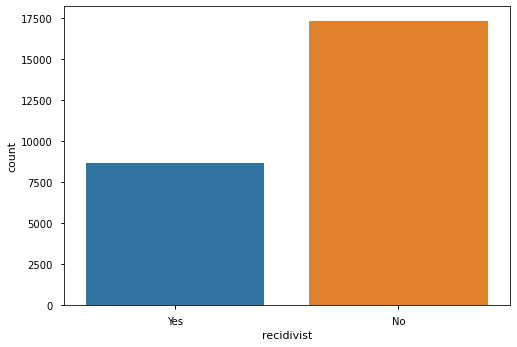

In [16]:
## Visualzie class balance
sns.countplot(data=df,x='recidivist')

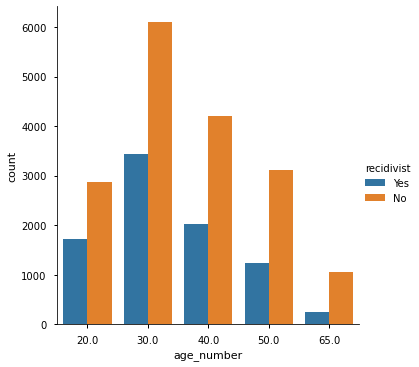

In [17]:
sns.catplot(data=df, x='age_number',hue='recidivist',kind='count')

## MODEL

### Train-Test-Split

In [18]:
from sklearn.model_selection import train_test_split

y = df['recidivist'].map({'Yes':1,"No":0})
X = df.drop(columns=['recidivist',*drop_cols])

## Train test split
X_train, X_test, y_train,y_test  = train_test_split(X,y,test_size=.3,
                                                    random_state=3210)#,stratify=y)
y_train.value_counts(normalize=True)

0    0.668058
1    0.331942
Name: recidivist, dtype: float64

#### Pipelnes and ColumnTransformer

In [19]:
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [20]:
X_train.isna().sum()

crime_class        12
crime_type          0
crime_subtype       0
release_type     1252
super_dist       6681
target_pop          0
sex                 2
race               25
age_number          2
dtype: int64

In [21]:
from sklearn import set_config
set_config(display='diagram')

In [22]:
## saving list of numeric vs categorical feature
num_cols = list(X_train.select_dtypes('number').columns)
cat_cols = list(X_train.select_dtypes('object').columns)
num_cols,cat_cols

(['age_number'],
 ['crime_class',
  'crime_type',
  'crime_subtype',
  'release_type',
  'super_dist',
  'target_pop',
  'sex',
  'race'])

In [23]:
## create pipelines and column transformer
num_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
#     ('scale',StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='MISSING')),
    ('encoder',OneHotEncoder(sparse=False,handle_unknown='ignore'))])

## COMBINE BOTH PIPELINES INTO ONE WITH COLUMN TRANSFORMER
preprocessor=ColumnTransformer(transformers=[
    ('num',num_transformer,num_cols),
    ('cat',cat_transformer,cat_cols)])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['age_number']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['crime_class', 'crime_type', 'crime_subtype',
                                  'release_type', 'super_dist', 'target_pop',
                                  'sex', 'race'])])

In [24]:
## Fit preprocessing pipeline on training data and pull out the feature names and X_cols
preprocessor.fit(X_train)

## Use the encoder's .get_feature_names
cat_features = list(preprocessor.named_transformers_['cat'].named_steps['encoder']\
                            .get_feature_names(cat_cols))
X_cols = num_cols+cat_features

## Transform X_traian,X_test and remake dfs
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          index=X_train.index, columns=X_cols)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          index=X_test.index, columns=X_cols)

## Tranform X_train and X_test and make into DataFrames
X_train_df

,age_number,crime_class_A Felony,crime_class_Aggravated Misdemeanor,crime_class_B Felony,crime_class_C Felony,crime_class_D Felony,crime_class_Felony - Enhanced,crime_class_MISSING,crime_class_Serious Misdemeanor,crime_class_Sex Offender,...,target_pop_Yes,sex_Female,sex_MISSING,sex_Male,race_American Native,race_Asian or Pacific Islander,race_Black,race_Hispanic,race_MISSING,race_White
19732,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5802,40.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
19945,40.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7031,40.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23418,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6527,30.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9967,50.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
16747,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
916,50.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


### Functions from Prior Classes

In [25]:
## Write a fucntion to evalute the model
import sklearn.metrics as metrics
from sklearn.tree import plot_tree
## Modified version of our simple eval function from Topic 25 Part 2 Study Group
# - Added X_train and y_train for if we want scores for both train and test
def evaluate_classification(model, X_test_tf,y_test,cmap='Greens',
                            normalize='true',classes=None,figsize=(10,4),
                            X_train = None, y_train = None,):
    """Evaluates a scikit-learn binary classification model.

    Args:
        model (classifier): any sklearn classification model.
        X_test_tf (Frame or Array): X data
        y_test (Series or Array): y data
        cmap (str, optional): Colormap for confusion matrix. Defaults to 'Greens'.
        normalize (str, optional): normalize argument for plot_confusion_matrix. 
                                    Defaults to 'true'.
        classes (list, optional): List of class names for display. Defaults to None.
        figsize (tuple, optional): figure size Defaults to (8,4).
        
        X_train (Frame or Array, optional): If provided, compare model.score 
                                for train and test. Defaults to None.
        y_train (Series or Array, optional): If provided, compare model.score 
                                for train and test. Defaults to None.
    """
    

    y_hat_test = model.predict(X_test_tf)
    print(metrics.classification_report(y_test, y_hat_test,target_names=classes))
    
    fig,ax = plt.subplots(ncols=2,figsize=figsize)
    metrics.plot_confusion_matrix(model, X_test_tf,y_test,cmap=cmap, 
                                  normalize=normalize,display_labels=classes,
                                 ax=ax[0])
    
    curve = metrics.plot_roc_curve(model,X_test_tf,y_test,ax=ax[1])
    curve.ax_.grid()
    curve.ax_.plot([0,1],[0,1],ls=':')
    fig.tight_layout()
    plt.show()
    
    ## Add comparing Scores if X_train and y_train provided.
    if (X_train is not None) & (y_train is not None):
        print(f"Training Score = {model.score(X_train,y_train):.2f}")
        print(f"Test Score = {model.score(X_test_tf,y_test):.2f}")
        
        
        
def evaluate_grid(grid,X_test,y_test,X_train=None,y_train=None):
    print('The best parameters were:')
    print("\t",grid.best_params_)
    
    model = grid.best_estimator_    

    print('\n[i] Classification Report')
    evaluate_classification(model, X_test,y_test,X_train=X_train,y_train=y_train)
    
    
    
def plot_importance(tree, X_train_df, top_n=20,figsize=(10,10)):
    
    df_importance = pd.Series(tree.feature_importances_,
                              index=X_train_df.columns)
    df_importance.sort_values(ascending=True).tail(top_n).plot(
        kind='barh',figsize=figsize,title='Feature Importances',
    ylabel='Feature',)
    return df_importance



def show_tree(clf,figsize=(60,25),class_names=['Died','Survived'],
              savefig=False,fname='titanic_tree.pdf',max_depth=None,):
    
    fig,ax = plt.subplots(figsize=figsize)
    plot_tree(clf,filled=True,rounded=True,proportion=True,
              feature_names=X_train_df.columns,
              class_names=class_names,ax=ax);
    fig.tight_layout()
    
    if savefig:
        fig.savefig(fname, dpi=300,orientation='landscape')
    return fig

## Baseline Model (DummyClassifier)

              precision    recall  f1-score   support

           0       0.66      0.65      0.66      5171
           1       0.33      0.33      0.33      2635

    accuracy                           0.54      7806
   macro avg       0.49      0.49      0.49      7806
weighted avg       0.54      0.54      0.54      7806



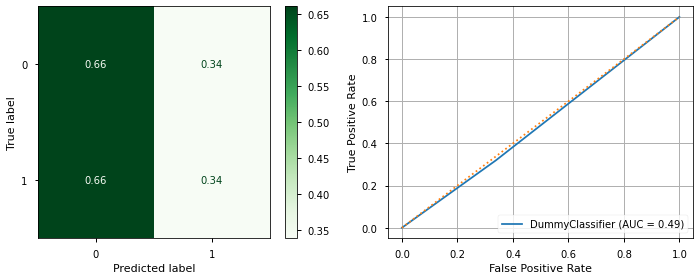

Training Score = 0.56
Test Score = 0.56


In [26]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier()
clf.fit(X_train_df,y_train)
evaluate_classification(clf,X_test_df,y_test,X_train=X_train_df,y_train =y_train)

> **Q: What do we notice about the results of our dummy classifier?**

## Vanilla DecisionTree

              precision    recall  f1-score   support

           0       0.73      0.58      0.65      5171
           1       0.41      0.57      0.48      2635

    accuracy                           0.58      7806
   macro avg       0.57      0.58      0.56      7806
weighted avg       0.62      0.58      0.59      7806



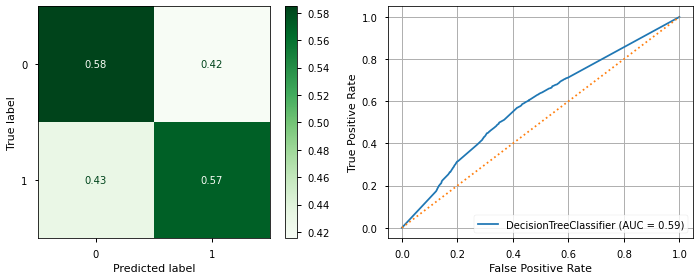

Training Score = 0.78
Test Score = 0.58


In [27]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(class_weight='balanced')
tree.fit(X_train_df,y_train)
evaluate_classification(tree,X_test_df,y_test,X_train=X_train_df,y_train =y_train)

In [28]:
# how deep is tree?
tree.get_depth()

38

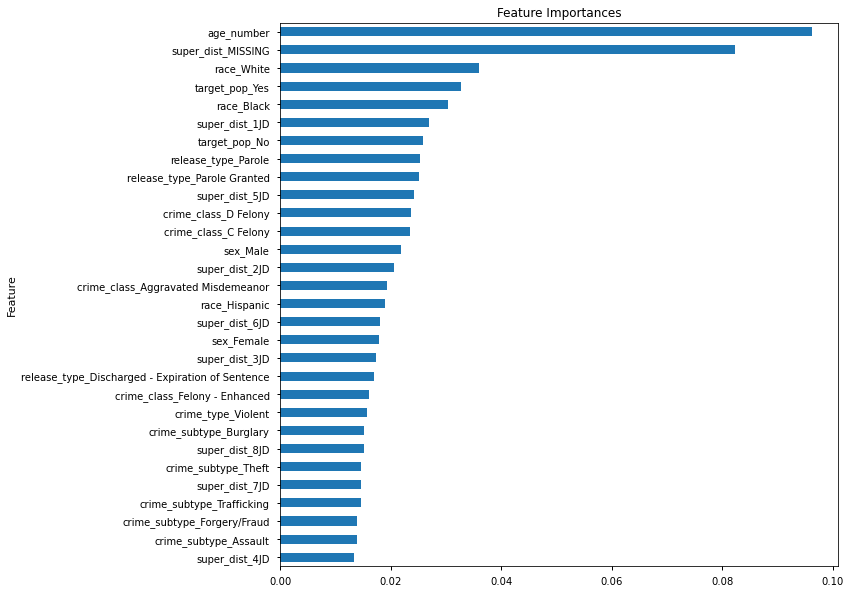

In [29]:
## Check feature importance
importances = plot_importance(tree,X_train_df,top_n=30)

In [30]:
# show_tree(tree,savefig=True,fname='prisoners_tree.pdf',max_depth=5)

### Hyperparameters Tuning

- `max-depth`
- `min_samples_leaf`: The smallest number of samples that can be in a leaf (node)
- `min_samples_split`: The smallest number of samples in a leaf (node) before splitting it
- `max_features`: Most features to consider when splitting

In [31]:
X_train_df.shape

(18214, 76)

The best parameters were:
	 {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'max_features': 70, 'min_samples_leaf': 1}

[i] Classification Report
              precision    recall  f1-score   support

           0       0.77      0.56      0.65      5171
           1       0.44      0.67      0.53      2635

    accuracy                           0.60      7806
   macro avg       0.60      0.62      0.59      7806
weighted avg       0.66      0.60      0.61      7806



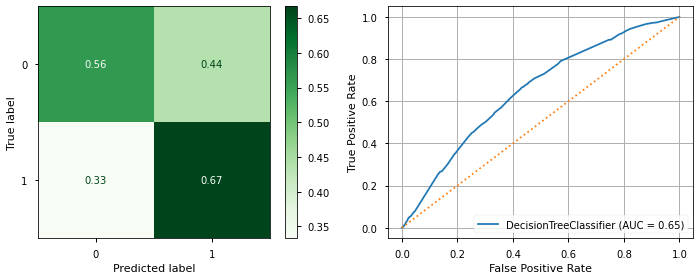

Training Score = 0.63
Test Score = 0.60


In [32]:
## Import GridSearch
from sklearn.model_selection import GridSearchCV
## Instantiate classifier
tree = DecisionTreeClassifier()
## Set up param grid
param_grid = {'criterion':['gini','entropy'],
             'max_depth':[None, 5,10,15,20],
              'min_samples_leaf':[1,2,3],
              'class_weight':['balanced'],
             'max_features':['auto',10,30,70,None]}

## Instantiate GridSearchCV
grid_clf = GridSearchCV(tree,param_grid,scoring='f1_macro')
grid_clf.fit(X_train_df,y_train)
evaluate_grid(grid_clf,X_test_df,y_test,X_train=X_train_df,y_train =y_train)

The best parameters were:
	 {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'max_features': 70, 'min_samples_leaf': 3}

[i] Classification Report
              precision    recall  f1-score   support

           0       0.77      0.55      0.64      5171
           1       0.44      0.69      0.53      2635

    accuracy                           0.59      7806
   macro avg       0.61      0.62      0.59      7806
weighted avg       0.66      0.59      0.61      7806



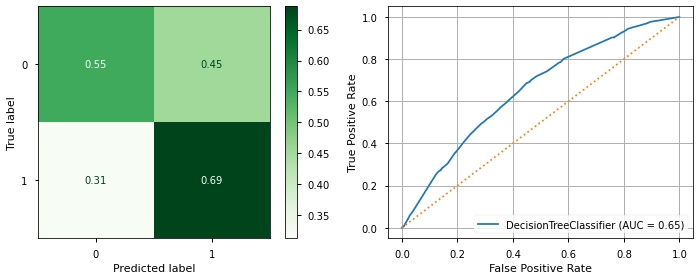

Training Score = 0.62
Test Score = 0.59


In [33]:
## Instantiate GridSearchCV
grid_clf = GridSearchCV(tree,param_grid,scoring='recall_macro')
grid_clf.fit(X_train_df,y_train)
evaluate_grid(grid_clf,X_test_df,y_test,X_train=X_train_df,y_train =y_train)

## Bagging 

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      5171
           1       0.44      0.35      0.39      2635

    accuracy                           0.63      7806
   macro avg       0.57      0.56      0.57      7806
weighted avg       0.61      0.63      0.62      7806



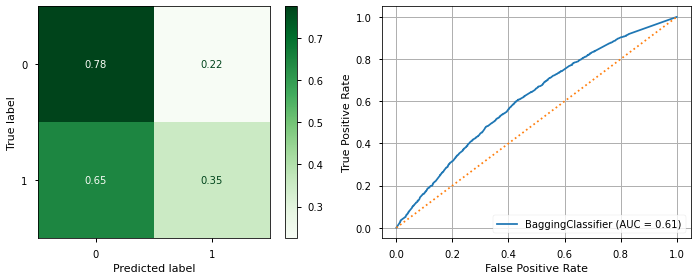

Training Score = 0.81
Test Score = 0.63


In [34]:
## Import bagging classifier
from sklearn.ensemble import BaggingClassifier

## Fit Classifier and get predictions
bag = BaggingClassifier()
bag.fit(X_train_df,y_train)
evaluate_classification(bag,X_test_df,y_test,X_train=X_train_df,y_train =y_train)

### ✍️ Dealing with Class Imbalance with encoded feature via `SMOTENC`

- AKA when there's no `class_weight` argument and you have one hot encoded features

#### SMOTENC is another SMOTE class from imblearn
- https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTENC.html
- It is designed for categorical features. 
- It needs a list of True/False for every feature (True=one hot encoded, False=numerical)_

In [35]:
from imblearn.over_sampling import SMOTE,SMOTENC


In [36]:
X_train_df

,age_number,crime_class_A Felony,crime_class_Aggravated Misdemeanor,crime_class_B Felony,crime_class_C Felony,crime_class_D Felony,crime_class_Felony - Enhanced,crime_class_MISSING,crime_class_Serious Misdemeanor,crime_class_Sex Offender,...,target_pop_Yes,sex_Female,sex_MISSING,sex_Male,race_American Native,race_Asian or Pacific Islander,race_Black,race_Hispanic,race_MISSING,race_White
19732,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5802,40.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
19945,40.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7031,40.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23418,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6527,30.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9967,50.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
16747,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
916,50.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
num_cols

['age_number']

In [38]:
cat_features[:5]

['crime_class_A Felony',
 'crime_class_Aggravated Misdemeanor',
 'crime_class_B Felony',
 'crime_class_C Felony',
 'crime_class_D Felony']

In [39]:
## Save list of trues and falses for each cols
smote_feats = [False]*len(num_cols) +[True]*len(cat_features)
# smote_feats

In [40]:
smote = SMOTENC(smote_feats)
X_train_sm,y_train_sm = smote.fit_sample(X_train_df,y_train)
y_train_sm.value_counts()

1    12168
0    12168
Name: recidivist, dtype: int64

#### Retrain BaggingClassifer on resampled data

              precision    recall  f1-score   support

           0       0.72      0.68      0.70      5171
           1       0.43      0.49      0.46      2635

    accuracy                           0.61      7806
   macro avg       0.58      0.58      0.58      7806
weighted avg       0.62      0.61      0.62      7806



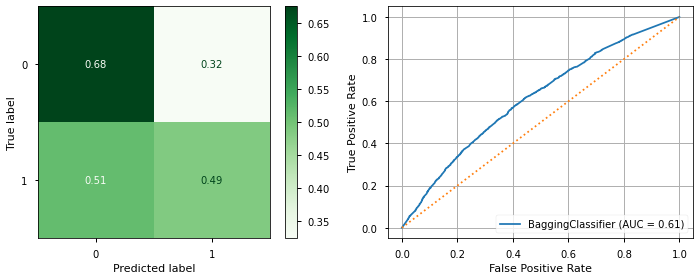

Training Score = 0.83
Test Score = 0.61


In [41]:
bag = BaggingClassifier()
bag.fit(X_train_sm,y_train_sm)
evaluate_classification(bag,X_test_df,y_test,X_train=X_train_sm,y_train =y_train_sm)

## RandomForestClassifier

              precision    recall  f1-score   support

           0       0.72      0.69      0.71      5171
           1       0.44      0.47      0.46      2635

    accuracy                           0.62      7806
   macro avg       0.58      0.58      0.58      7806
weighted avg       0.63      0.62      0.62      7806



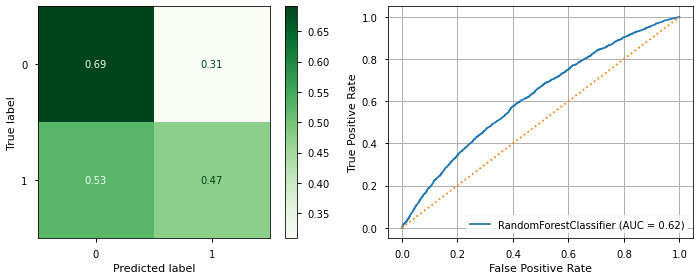

Training Score = 0.81
Test Score = 0.62


In [42]:
## Import Random Forest
from sklearn.ensemble import RandomForestClassifier

## Fit Random Forest
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train_df, y_train)
evaluate_classification(rf,X_test_df,y_test,X_train=X_train_df,y_train =y_train)

age_number                            0.223497
crime_class_A Felony                  0.000035
crime_class_Aggravated Misdemeanor    0.022783
crime_class_B Felony                  0.011316
crime_class_C Felony                  0.024661
                                        ...   
race_Asian or Pacific Islander        0.004319
race_Black                            0.031454
race_Hispanic                         0.015889
race_MISSING                          0.000704
race_White                            0.034708
Length: 76, dtype: float64

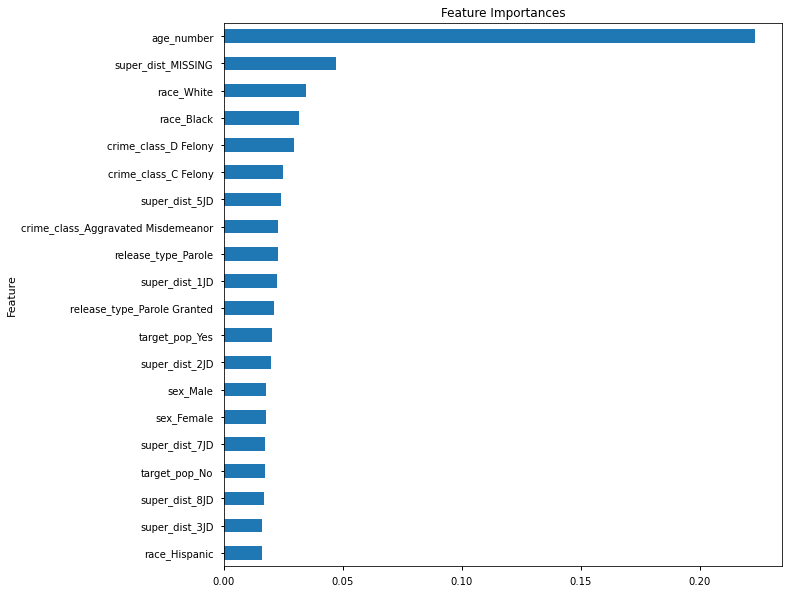

In [43]:
## get feature importance
plot_importance(rf,X_train_df)

              precision    recall  f1-score   support

           0       0.72      0.68      0.70      5171
           1       0.44      0.49      0.46      2635

    accuracy                           0.61      7806
   macro avg       0.58      0.58      0.58      7806
weighted avg       0.63      0.61      0.62      7806



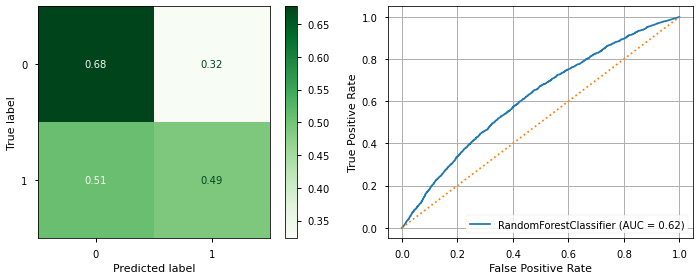

Training Score = 0.83
Test Score = 0.61


In [44]:
## Try using smote instead of class_weight
rf = RandomForestClassifier()
rf.fit(X_train_sm, y_train_sm)
evaluate_classification(rf,X_test_df,y_test,X_train=X_train_sm,y_train =y_train_sm)

## ExtraTrees Algorithm

- Instead of always choosing the *optimal* branching path, we  choose a branching path at random. 

              precision    recall  f1-score   support

           0       0.73      0.62      0.67      5171
           1       0.42      0.55      0.48      2635

    accuracy                           0.59      7806
   macro avg       0.58      0.58      0.57      7806
weighted avg       0.63      0.59      0.60      7806



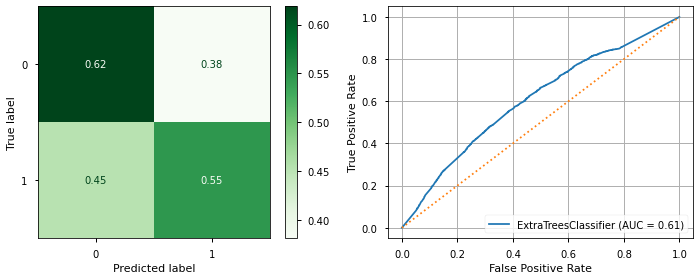

Training Score = 0.78
Test Score = 0.59


In [45]:
## Import and fit an ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier

etrees = ExtraTreesClassifier(class_weight='balanced')
etrees.fit(X_train_df, y_train)
evaluate_classification(etrees,X_test_df,y_test,X_train=X_train_df,y_train =y_train)

## XGBoost

> "`XGBoost` is a stand-alone library that implements popular gradient boosting algorithms in the fastest, most performant way possible. There are many under-the-hood optimizations that allow XGBoost to train more quickly than any other library implementations of gradient boosting algorithms:
- For instance, XGBoost is configured in such a way that it parallelizes the construction of trees across all your computer's CPU cores during the training phase. 
- It also allows for more advanced use cases, such as distributing training across a cluster of computers, which is often a technique used to speed up computation. 
- The algorithm even automatically handles missing values!"

In [46]:
## import xgboost RF
from xgboost import XGBRFClassifier,XGBClassifier

### `XGBClassifier`

              precision    recall  f1-score   support

           0       0.70      0.87      0.78      5171
           1       0.53      0.28      0.36      2635

    accuracy                           0.67      7806
   macro avg       0.61      0.57      0.57      7806
weighted avg       0.64      0.67      0.64      7806



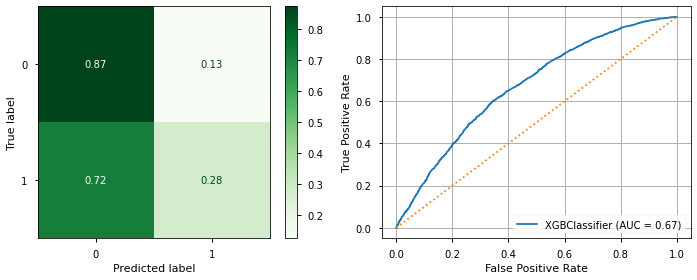

Training Score = 0.73
Test Score = 0.67


In [47]:
## Fit and Evaluate single tree
xgg_clf = XGBClassifier()
xgg_clf.fit(X_train_df, y_train)
evaluate_classification(xgg_clf,X_test_df,y_test,X_train=X_train_df,y_train =y_train)

              precision    recall  f1-score   support

           0       0.75      0.68      0.71      5171
           1       0.46      0.55      0.50      2635

    accuracy                           0.63      7806
   macro avg       0.60      0.61      0.61      7806
weighted avg       0.65      0.63      0.64      7806



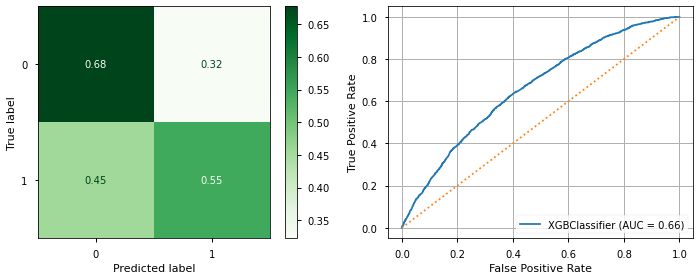

Training Score = 0.74
Test Score = 0.63


In [48]:
## single boosted tree with smoted data
xgg_clf = XGBClassifier()
xgg_clf.fit(X_train_sm, y_train_sm)
evaluate_classification(xgg_clf,X_test_df,y_test,X_train=X_train_sm,y_train =y_train_sm)

### `XGBRFClassifier`

0.6538461538461539
0.6088905969766846
              precision    recall  f1-score   support

           0       0.78      0.57      0.66      5171
           1       0.45      0.68      0.54      2635

    accuracy                           0.61      7806
   macro avg       0.61      0.63      0.60      7806
weighted avg       0.67      0.61      0.62      7806



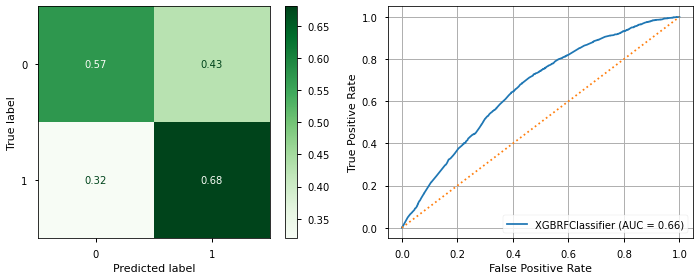

Training Score = 0.65
Test Score = 0.61


In [49]:
## fit on smoted dta
xgb_rf = XGBRFClassifier()
xgb_rf.fit(X_train_sm, y_train_sm)

print(xgb_rf.score(X_train_sm,y_train_sm))
print(xgb_rf.score(X_test_df,y_test))

# y_hat_test = xgb_rf.predict(X_test)

# evaluate_model(y_test,y_hat_test,X_test,xgb_rf)
evaluate_classification(xgb_rf,X_test_df,y_test,X_train=X_train_sm,y_train =y_train_sm)

              precision    recall  f1-score   support

           0       0.78      0.55      0.64      5171
           1       0.44      0.70      0.54      2635

    accuracy                           0.60      7806
   macro avg       0.61      0.62      0.59      7806
weighted avg       0.67      0.60      0.61      7806



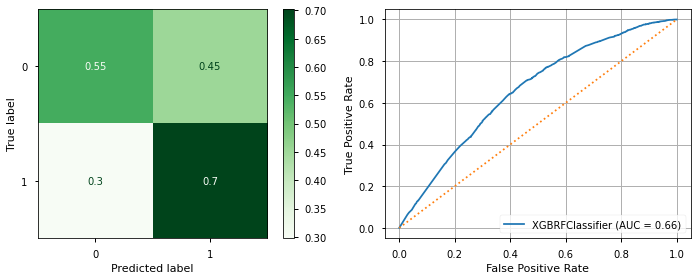

Training Score = 0.64
Test Score = 0.60


In [50]:
## setup param grid for gridsearch

xgbrf_grid = {'colsample_bynode': 0.8, 'learning_rate': 1,
              'max_depth': 5, 'num_parallel_tree': 100, 
              'objective': 'binary:logistic', 'subsample': 0.8}

xrf_clf = XGBRFClassifier(**xgbrf_grid)
xrf_clf.fit(X_train_sm,y_train_sm)
evaluate_classification(xrf_clf,X_test_df,y_test,X_train=X_train_sm,y_train =y_train_sm)

age_number                            0.045217
crime_class_A Felony                  0.000000
crime_class_Aggravated Misdemeanor    0.018598
crime_class_B Felony                  0.002138
crime_class_C Felony                  0.003395
                                        ...   
race_Asian or Pacific Islander        0.006161
race_Black                            0.003134
race_Hispanic                         0.027339
race_MISSING                          0.000000
race_White                            0.007295
Length: 76, dtype: float32

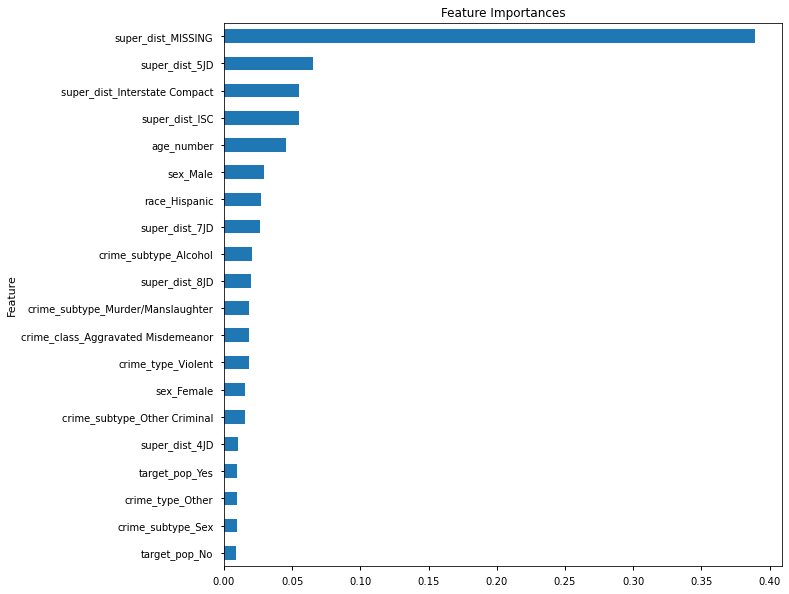

In [51]:
plot_importance(xrf_clf,X_train_df)

# ✍️ Using Cross Validation (besides GridSearchCV) 

#### CV Workflow: 

1. Train/Test split
2. Create a model. 
3. Apply Cross Validation with the training data. 
4. Evaluate Cross validation scores:
    - If not happy with the scores:
        - Try different model/hyperparameters.
    - If happy with scores/performance:
        - Train an **individual** model (not-cv) on the **training data** and **evaluate with the test data.**

        
5. If individual model performs well on test data (isn't overfit) **and you are planning to deploy the model:** 
    - You would **re-train the model** on the **entire combined data set** (X =X_train+X_test, y=y_train+y_test) before pickling/saving the model. 


In [52]:
from sklearn.model_selection import cross_validate,cross_val_score,cross_val_predict

- Cross validation **functions** from sklearn.model_selection:
    - `cross_validate`: 
        - returns dict of K-fold  scores for the training data, including the training times.
    - `cross_val_score`:
        - returns the K-fold validation scores for the K-fold's test-splits
        
    - `cross_val_predict`:
        - returns predictions from the cross validated model. 

In [53]:
## Create, fit, and evaluate a vanilla DecisionTreeClassifier


In [54]:
## cross_validate


In [55]:
## cross_val_score


In [56]:
## cross_val_predict


In [57]:
## If happy with results, train an individual model and evaluate with test data


In [58]:
## if happy with train/test split results, can re-train model on entire dataset


## Saving Models

- Guide on Saving Models: 
    - https://scikit-learn.org/stable/modules/model_persistence.html

### With `Pickle`

In [59]:
import pickle
s = pickle.dumps(clf)
type(s)

bytes

In [60]:
loaded_s = pickle.loads(s)
loaded_s

DummyClassifier()

In [61]:
evaluate_classification(loaded_s,X_tf,y)

NameError: name 'X_tf' is not defined

### With `joblib` (sklearn's preferred method)

In [ ]:
import joblib
joblib.dump(clf, 'model.joblib') 

In [ ]:
clf_jb = joblib.load('model.joblib')
clf_jb

In [ ]:
evaluate_classification(clf_jb,X_tf,y)

# APPENDIX

## ✍️ Stacked Models 

- `StackingClassifier`: 
    - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html
- `VotingClassifier`:
    - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

#### if there's time: combine several of the best models into one meta-classifier

In [ ]:
from sklearn.ensemble import StackingClassifier,VotingClassifier


## Other Packages


> Catboost: https://catboost.ai/